In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/pulsar_data_train.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [4]:
df.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [5]:
d1 = df.fillna(df.mean())
d2 = df.dropna()

In [6]:
len(d1), len(d2)

(12528, 9273)

SVM, HYPERPLANE,Margin, Kernel
1. linear
2. Poly
3. RBF(**)
4. Sigmoid


In [7]:
X1 = d1.drop('target_class', axis=1)
X2 = d2.drop('target_class', axis=1)
Y1 = d1['target_class']
Y2 = d2['target_class']

In [8]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X1 = SS.fit_transform(X1)
X2 = SS.fit_transform(X2)

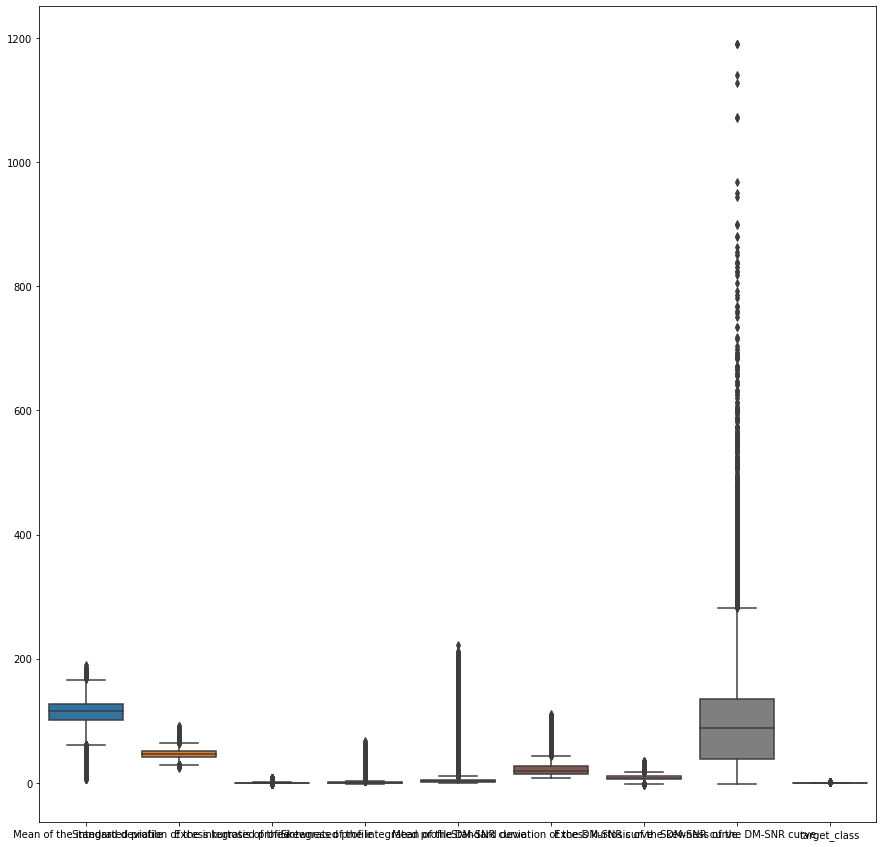

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.boxplot(data=d1)

In [10]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [11]:
from typing import Dict, List


def fit_name_add(svc,svc2, X_train, Y_train, X_test, Y_test,results,label):
    svc.fit(X1_train, Y1_train)
    svc2.fit(X2_train, Y2_train)
    predict1_1 = svc.predict(X1_test)
    predict2_1 = svc2.predict(X2_test)
    results[label] = [svc.score(X1_test, Y1_test), svc2.score(X2_test, Y2_test)]
    return results

In [12]:
results = {}
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1.0, gamma='auto')
svc2 = SVC(kernel='rbf', C=1.0, gamma='auto')
results = fit_name_add(svc,svc2, X1_train, Y1_train, X1_test, Y1_test,results,'1_rbc_auto')

In [13]:
svc = SVC(kernel='rbf', C=100.0)
svc2 = SVC(kernel='rbf', C=100.0)
results = fit_name_add(svc,svc2, X1_train, Y1_train, X1_test, Y1_test,results,'100_rbf')

In [14]:
svc = SVC(kernel='rbf', C=1000.0)
svc2 = SVC(kernel='rbf', C=1000.0)
results = fit_name_add(svc,svc2, X1_train, Y1_train, X1_test, Y1_test,results,'1000_rbf')

In [15]:
svc = SVC(kernel='linear', C=1.0)
svc2 = SVC(kernel='linear', C=1.0)
results = fit_name_add(svc,svc2, X1_train, Y1_train, X1_test, Y1_test,results,'1_linear')

In [16]:

svc = SVC(kernel='linear', C=100.0)
svc2 = SVC(kernel='linear', C=100.0)
results = fit_name_add(svc,svc2, X1_train, Y1_train, X1_test, Y1_test,results,'100_linear')

In [17]:
svc = SVC(kernel='linear', C=1000.0)
svc2 = SVC(kernel='linear', C=1000.0)
results = fit_name_add(svc,svc2, X1_train, Y1_train, X1_test, Y1_test,results,'1000_linear')

In [18]:
svc = SVC(kernel='rbf', C=100.0,gamma=100.0)
svc2 = SVC(kernel='rbf', C=100.0,gamma=100.0)
results = fit_name_add(svc,svc2, X1_train, Y1_train, X1_test, Y1_test,results,'100_rbf_100_gamma')

In [19]:
results


{'1_rbc_auto': [0.9796488427773344, 0.9800539083557952],
 '100_rbf': [0.9776536312849162, 0.9778975741239893],
 '1000_rbf': [0.9764565043894653, 0.9752021563342318],
 '1_linear': [0.9776536312849162, 0.9800539083557952],
 '100_linear': [0.9780526735833999, 0.9811320754716981],
 '1000_linear': [0.9784517158818835, 0.9811320754716981],
 '100_rbf_100_gamma': [0.9094173982442139, 0.9121293800539083]}